 ## Example 0: (bond-graph model from nxgraph)
This example shows how to obtain BG model from nx graph.

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

import sys
sys.path.append("../")

from core.base import ElementFactory
from core.BondGraph2 import BondGraphModel
from rules.engine import RuleEngine
from equations.generator import EquationGenerator
from equations.statespace import CauchyFormGenerator
from equations.statespace import StateSpaceBuilder

from numerical.simulation import BondGraphSimulator


from inout.visualizer import draw_bond_graph, custom_layered_layout


import networkx as nx
import numpy as np

from core.utils import BondGraphModel_from_nx

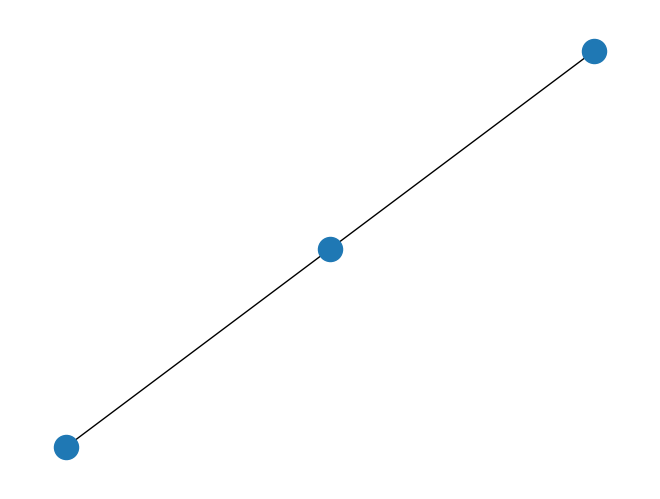

In [3]:

G = nx.Graph()
G.add_edge('R1', '0-1')
G.add_edge('0-1', 'C2')


nx.draw(G)


In [4]:
model = BondGraphModel_from_nx(G)

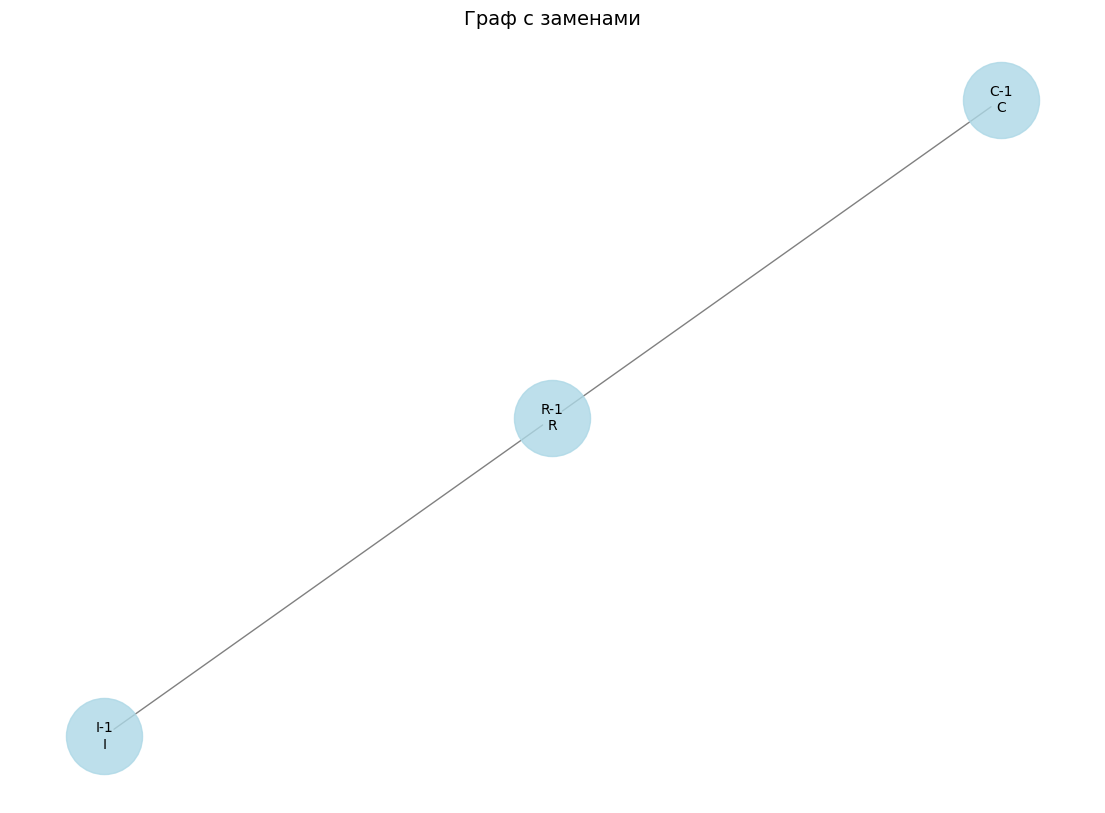

In [5]:
# Create a NetworkX graph
nx_graph = nx.Graph()
nx_graph.add_node("C-1", type="C")  # Capacitor
nx_graph.add_node("R-1", type="R")  # Resistor
nx_graph.add_node("I-1", type="I")  # Inductor

# Add edges between the nodes
nx_graph.add_edge("C-1", "R-1")
nx_graph.add_edge("R-1", "I-1")


# Визуализация
pos = nx.spring_layout(nx_graph)
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(nx_graph, pos, node_size=3000, node_color="lightblue", alpha=0.8)
nx.draw_networkx_edges(nx_graph, pos, edge_color="gray", arrows=True)
nx.draw_networkx_labels(
    nx_graph,
    pos,
    labels={node: f"{node}\n{data.get('type', 'N/A')}" for node, data in nx_graph.nodes(data=True)},
    font_size=10,
)
plt.title("Граф с заменами", fontsize=14)
plt.axis("off")
plt.show()


In [6]:
model = BondGraphModel_from_nx(nx_graph)

In [7]:
# Apply causality rules
engine = RuleEngine(model, debug=False)
engine.apply_all()


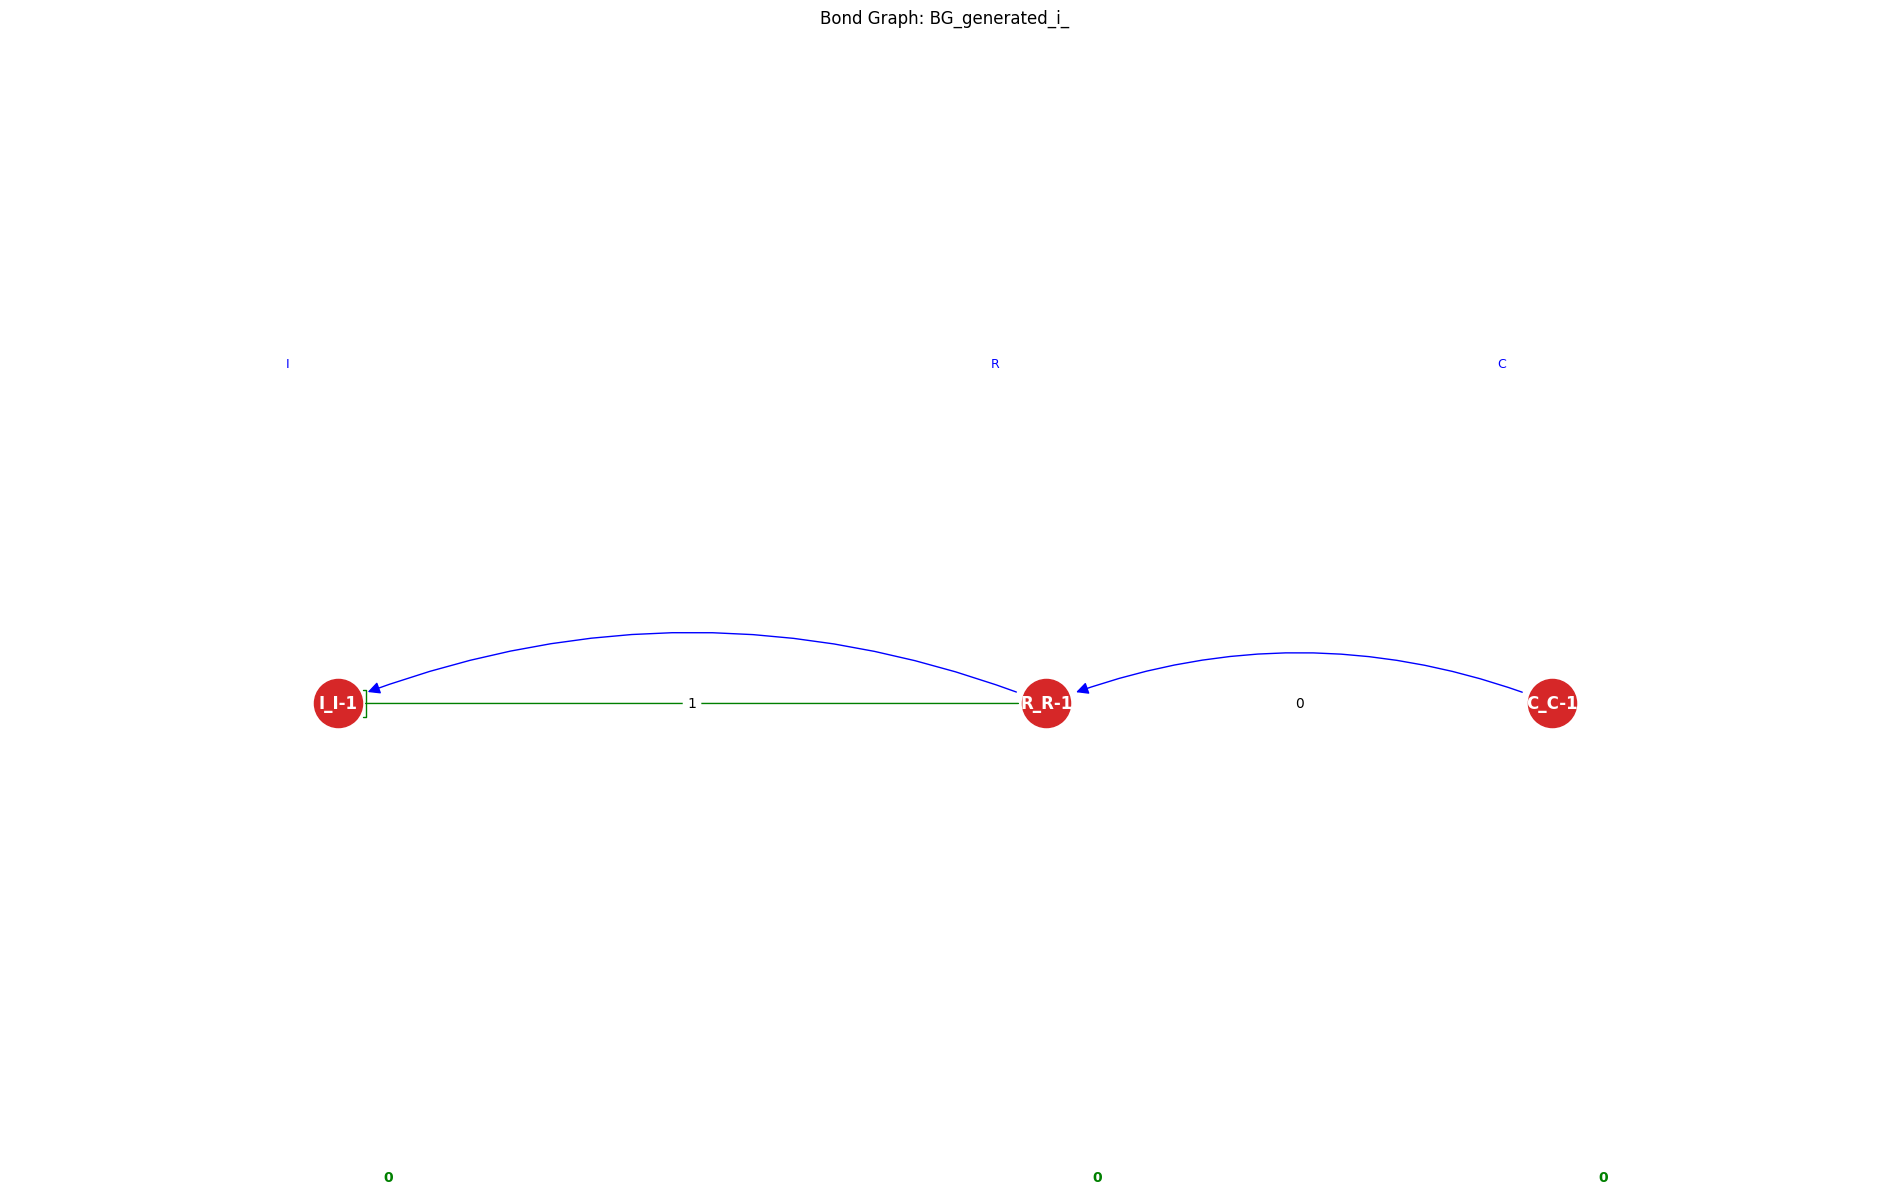

In [8]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)

### You can just crete variables with elements and attach them later
As shown below

# TODO UPDATE OLD EXAMPLE
Next code is not relevant

In [14]:
#Create some elements (this is unique elements with unique ID, hense if you reinitialize th sam variable you will get different component inside)
SE_1 = bg.BGelement('SE')
SF_1 = bg.BGelement('SF', Position=[2,1]) # Position is only for visualization so you can skip and it will be assign automatically 
C_1 = bg.BGelement('C', Position=[3,6])
R_1 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I', Position=[0,3])
OneJ_1 = bg.BGelement('1', Position=[0,1])
OneJ_2 = bg.BGelement('1', Position=[1,1])
OneJ_3 = bg.BGelement('1', Position=[2,0])
ZeroJ_1 = bg.BGelement('0', Position=[1,0])

NameError: name 'bg' is not defined

In [15]:
SE_1.getId() # just to see what is inside

NameError: name 'SE_1' is not defined

In [6]:
# Add elements to the model (without connecting)
# You can skip this step because during the connection the new elements will be automatically added to model
model.addElement(OneJ_1)
model.addElement(OneJ_2)
model.addElement(OneJ_3)
model.addElement(ZeroJ_1)
model.addElement(C_1)
model.addElement(R_1)

model.addElement(I_1)
model.addElement(SE_1)
model.addElement(SF_1)

In [7]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(OneJ_1, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_2)
model.connect(ZeroJ_1, OneJ_3)
model.connect(C_1, OneJ_2)
model.connect(R_1, OneJ_2)
model.connect(OneJ_3, SF_1)

### Alternativly you can create and add elements at one step
A shown below, but if may later need this components for manupulation on model elements...

In [8]:
# model.connect(bg.BGelement('SE'), OneJ_1)

In [9]:
# when the elements added and conected you can try to comleate is automatically according to the all BG rules.
# if model is not defined properly you may get an ERRORS!
model.applyRules()

NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val


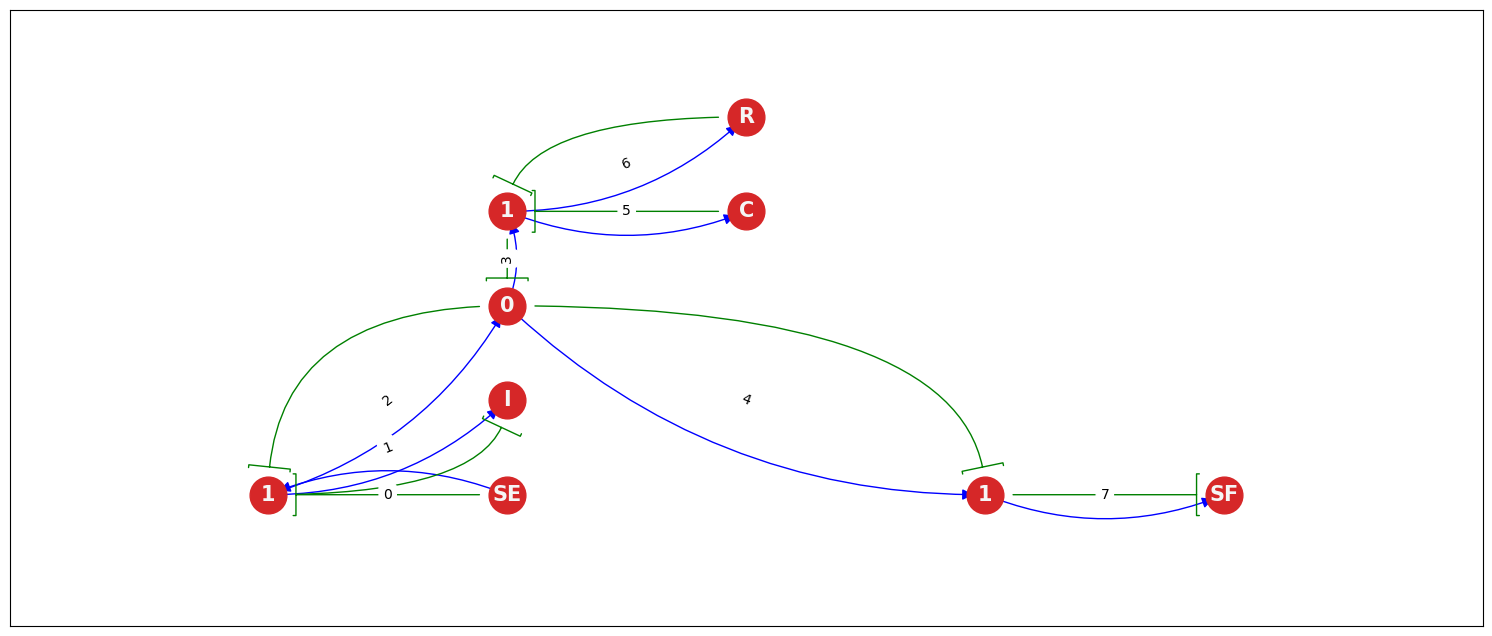

In [10]:
model.render() # Set positions automatically for drawing (some automatically done works on model)
model.draw() # Just draw the model

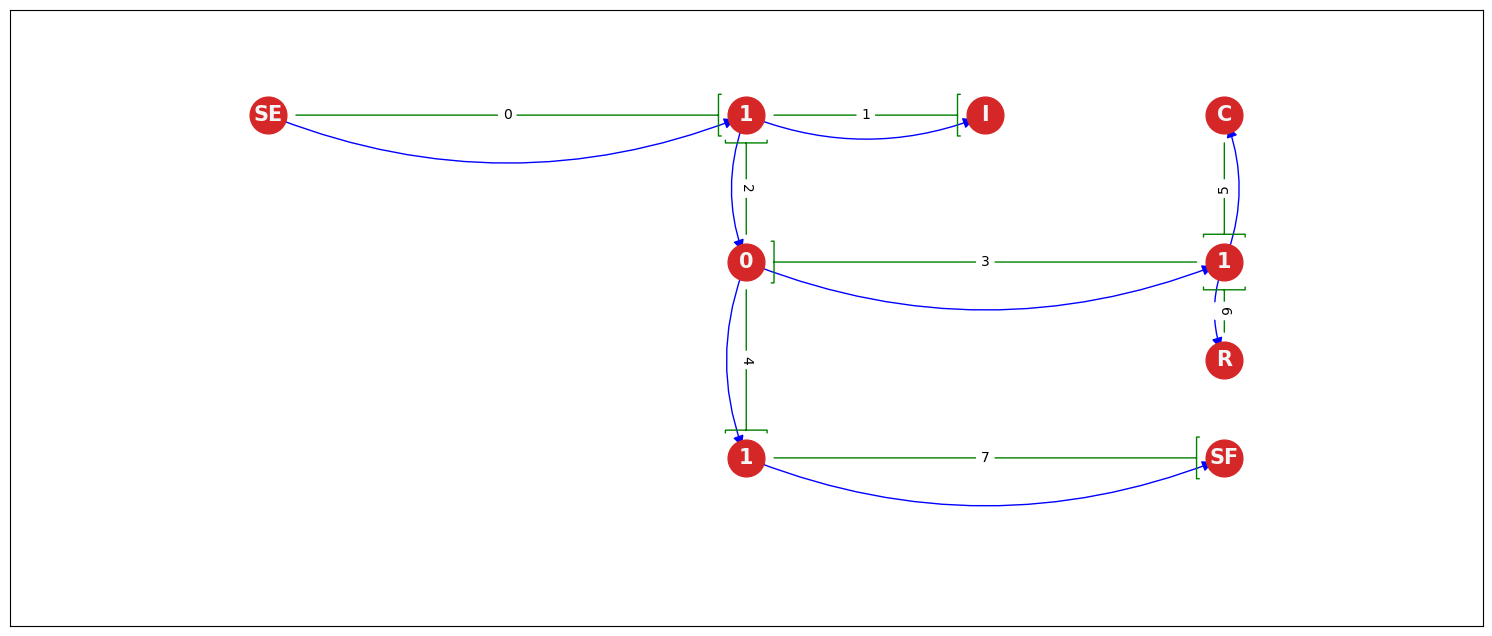

In [11]:
# set positions manually (Optional)
SE_1.setPosition([0,7])
OneJ_1.setPosition([2,7])
OneJ_2.setPosition([4,4])
OneJ_3.setPosition([2,0])
ZeroJ_1.setPosition([2,4])
I_1.setPosition([3,7])
C_1.setPosition([4,7])
R_1.setPosition([4,2])
SF_1.setPosition([4,0])

# draw
model.draw()

In [12]:
# If you want to check port states
bg.show_ports_state(model)

Element name:  1_5
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 4 |  arrow:  Output |  causality:  Causal
Element name:  1_6
++ port_id: 7 |  arrow:  Input |  causality:  Uncausal
++ port_id: 11 |  arrow:  Output |  causality:  Causal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 9 |  arrow:  Input |  causality:  Causal
++ port_id: 14 |  arrow:  Output |  causality:  Uncausal
Element name:  0_8
++ port_id: 5 |  arrow:  Input |  causality:  Uncausal
++ port_id: 6 |  arrow:  Output |  causality:  Causal
++ port_id: 8 |  arrow:  Output |  causality:  Uncausal
Element name:  C_2
++ port_id: 10 |  arrow:  Input |  causality:  Uncausal
Element name:  R_3
++ port_id: 12 |  arrow:  Input |  causality:  Uncausal
Element name:  I_4
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  SE_0
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  SF_1
++ 

## assign_equations SEQ


In [13]:
model.assign_equations()
equations = model.get_model_equations() # if you want to get the system of equations


In [14]:
equations

['+e0=+SE0',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I4*p4',
 '+e2=+e3=+e4',
 '+f0=+f1=+f2',
 '+e3=+e5+e6',
 '+f3=+f2-f4',
 '+e4=+e7',
 '+f4=+f7',
 '+e5=+1/C2*q2',
 '+f3=+f5=+f6',
 '+e6=+R3*f6',
 '+f3=+f5=+f6',
 '+e7=+e4',
 '+f7=+SF1']

## State-space form sequence

In [15]:
cauchy_state_equastions, variables_exp  = model.cauchy_form_equastions_sequence()

capacitor_variables= {'dq2/dt': f5, 'dp4/dt': e1}
final_vars= [SE0, SF1, q2, p4, C2, R3, I4]
dq2/dt =
variables list = {f5}
substituting... f5 -----b--- f3
exp in progress... f3
substituting... f3 -----b--- f2 - f4
exp in progress... f2 - f4
substituting... f2 -----b--- f0
exp in progress... f0 - f4
substituting... f4 -----b--- f7
exp in progress... f0 - f7
substituting... f0 -----b--- f1
exp in progress... f1 - f7
substituting... f7 -----b--- SF1
exp in progress... -SF1 + f1
substituting... f1 -----b--- p4/I4
exp in progress... -SF1 + p4/I4
-SF1 + p4/I4
dp4/dt =
variables list = {e1}
substituting... e1 -----b--- e0 - e2
exp in progress... e0 - e2
substituting... e2 -----b--- e3
exp in progress... e0 - e3
substituting... e0 -----b--- SE0
exp in progress... SE0 - e3
substituting... e3 -----b--- e5 + e6
exp in progress... SE0 - e5 - e6
substituting... e5 -----b--- q2/C2
exp in progress... SE0 - e6 - q2/C2
substituting... e6 -----b--- R3*f6
exp in progress... -R3*f6 + SE0 - q2/C2
substitu

In [16]:
model.final_variables


[SE0, SF1, q2, p4, C2, R3, I4]

In [17]:
cauchy_state_equastions

{'dq2/dt': -SF1 + p4/I4, 'dp4/dt': R3*SF1 + SE0 - R3*p4/I4 - q2/C2}

In [18]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print(f'The cauchy_state_equations: {cauchy_state_equastions} model state variables: {model.state_variables}')

############## STATE EQUASIONS ############
dq2/dt = -SF1 + p4/I4
dp4/dt = R3*SF1 + SE0 - R3*p4/I4 - q2/C2
####################################################
The cauchy_state_equations: {'dq2/dt': -SF1 + p4/I4, 'dp4/dt': R3*SF1 + SE0 - R3*p4/I4 - q2/C2} model state variables: [q2, p4]


In [19]:
print('effort-flow list: ', model.eff_flows_sp, '\nvariables list: ', model.final_variables, '\n ', model.state_variables, model.input_variables)

effort-flow list:  [e2, e5, e6, f1, e3, e7, e1, f0, f2, f3, f5, f7, e4, f4, e0, f6] 
variables list:  [SE0, SF1, q2, p4, C2, R3, I4] 
  [q2, p4] [SE0, SF1]


In [20]:
variables_exp

{e2: [e3],
 e5: [q2/C2],
 e6: [R3*f6],
 f1: [p4/I4],
 e3: [e5 + e6],
 e7: [e4],
 e1: [e0 - e2],
 f0: [f1],
 f2: [f0],
 f3: [f2 - f4],
 f5: [f3],
 f7: [SF1],
 e4: [e2],
 f4: [f7],
 e0: [SE0],
 f6: [f3]}

## Make state-space eq in matrix from

In [21]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.get_matrix_A()} \n Matrix B: {model.get_matrix_B()}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

Matrix A: Matrix([[0, 1/I4], [-1/C2, -R3/I4]]) 
 Matrix B: Matrix([[0, -1], [1, R3]])
 input_variables: [SE0, SF1] 
 state_variables: [q2, p4]


In [22]:
model.get_matrix_A()

Matrix([
[    0,   1/I4],
[-1/C2, -R3/I4]])

In [23]:
model.get_matrix_B()

Matrix([
[0, -1],
[1, R3]])

B_matrix = model.make_matrix_from_cauchy(B_matrix, cauchy_state_equastions, model.input_variables)
B_matrix

## Make С-D-matrix
Now we can set the input variables and get С-D-matrix

In [24]:
output_variables = "f7,e7"
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp, output_variables)

Input the names of output variables:
It mast be in list eff_flows:  [e2, e5, e6, f1, e3, e7, e1, f0, f2, f3, f5, f7, e4, f4, e0, f6] (Velocity of Force at some point)
U entered this:  ['f7', 'e7']
output variable=  f7
first match [SF1]
output variable=  e7
first match [e4]
next iteration with expression: e2
next iteration with expression: e3
next iteration with expression: e5 + e6
next iteration with expression: R3*f6 + q2/C2
next iteration with expression: R3*f3 + q2/C2
next iteration with expression: R3*(f2 - f4) + q2/C2
next iteration with expression: R3*(f0 - f7) + q2/C2
next iteration with expression: R3*(-SF1 + f1) + q2/C2
next iteration with expression: R3*(-SF1 + p4/I4) + q2/C2


In [25]:
cauchy_form_output_eq 

{f7: SF1, e7: -R3*SF1 + R3*p4/I4 + q2/C2}

In [26]:
model.make_output_statespace(cauchy_form_output_eq)


In [27]:
model.get_matrix_C()

Matrix([
[    0,   1/I4],
[-1/C2, -R3/I4]])

In [28]:
model.get_matrix_D()

Matrix([
[0, -1],
[1, R3]])

## Make numerical matrixes from symbolic

In [29]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1, 1, 1]

List of system parameters: [C2, R3, I4]


In [30]:
model.input_variables

[SE0, SF1]

In [31]:

initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=500
sampling_period=0.05
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 0] = 1

initial_state:  [[0.]
 [0.]]


In [32]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


<class 'numpy.ndarray'> (2, 2) <class 'numpy.ndarray'> (2, 2)


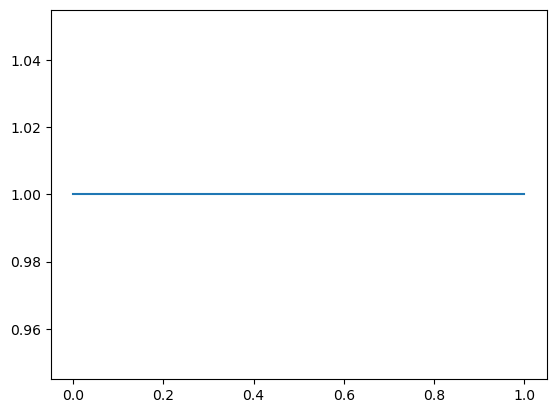

In [33]:
# plot input
plt.plot(input_sequence[0], label='Input)')


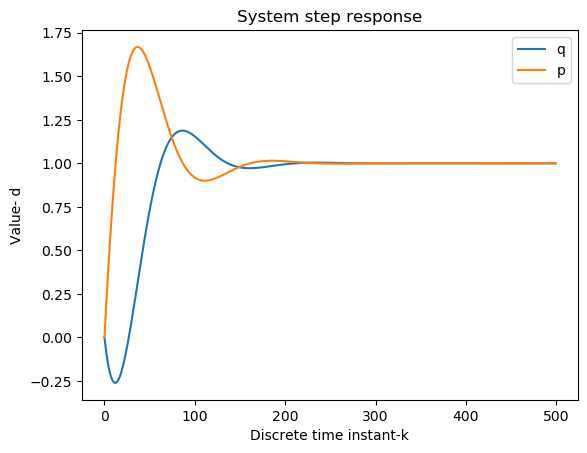

In [34]:
plt.plot(state[0,:-1], label='q')
plt.plot(state[1,:-1], label='p')
plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')
plt.title('System step response')
plt.legend()

AS WE CAN SEE MASS_SPRING SYSTEM BECAME STABLE OVER TIME